In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load excel data
df1 = pd.read_excel("qm7b_descriptors.xlsx")
df2 =  pd.read_excel("molecule_descriptors.xlsx")

In [3]:
# check data 1
df1.head()

,ID,nelectrons,size,types_of_atoms,composition,method,basis_set,AE
0,1849,52,15,"['H', 'C', 'N']","{'C': 5.0, 'N': 2.0, 'H': 8.0}",HF,sto3g,-14.04
1,1849,52,15,"['H', 'C', 'N']","{'C': 5.0, 'N': 2.0, 'H': 8.0}",HF,631g,-23.90
2,1849,52,15,"['H', 'C', 'N']","{'C': 5.0, 'N': 2.0, 'H': 8.0}",HF,ccpvdz,-24.07
3,1849,52,15,"['H', 'C', 'N']","{'C': 5.0, 'N': 2.0, 'H': 8.0}",MP2,sto3g,-5.44
4,1849,52,15,"['H', 'C', 'N']","{'C': 5.0, 'N': 2.0, 'H': 8.0}",MP2,631g,-18.62


In [4]:
# check data 2
df2.head()

,ID,Atom_1,Atom_2,Min_Distance,Max_Distance,Mean_Distance
0,1849,H,H,0.000000,6.371857,3.289494
1,1849,H,C,1.083776,5.749698,2.805458
2,1849,H,N,1.010020,5.781908,3.447566
3,1849,C,C,0.000000,3.853164,1.756994
4,1849,C,N,1.277064,5.041212,2.715005


In [5]:
# select 'CCSD(T)' and 'ccpvdz' from method and basis_set for the final data
df = df1[(df1['method'] == 'CCSD(T)') & (df1['basis_set'] == 'ccpvdz')]

In [6]:
# check final data
df.head()

,ID,nelectrons,size,types_of_atoms,composition,method,basis_set,AE
8,1849,52,15,"['H', 'C', 'N']","{'C': 5.0, 'N': 2.0, 'H': 8.0}",CCSD(T),ccpvdz,-21.70
17,4855,50,11,"['H', 'C', 'N', 'O']","{'C': 4.0, 'N': 2.0, 'O': 1.0, 'H': 4.0}",CCSD(T),ccpvdz,-33.50
26,6720,54,16,"['H', 'O', 'N', 'C']","{'O': 1.0, 'C': 5.0, 'N': 1.0, 'H': 9.0}",CCSD(T),ccpvdz,-23.98
35,1604,54,17,"['H', 'C', 'N']","{'C': 5.0, 'N': 2.0, 'H': 10.0}",CCSD(T),ccpvdz,27.51
44,6091,52,12,"['H', 'C', 'N', 'O']","{'N': 1.0, 'C': 4.0, 'O': 2.0, 'H': 5.0}",CCSD(T),ccpvdz,-19.02


## Atomic Distance

In [7]:
# all possible combinations for mean atomic distance - assign them as column names in the final data with initial value of 0

# Original list of tuples
possible_combinations_original_list = [('C', 'C'), ('H', 'O'), ('O', 'O'), ('S', 'S'), ('C', 'Cl'), ('C', 'S'), ('H', 'H'), ('C', 'N'),
                 ('H', 'C'), ('N', 'Cl'), ('C', 'O'), ('Cl', 'Cl'), ('N', 'S'), ('N', 'N'), ('Cl', 'S'), ('O', 'Cl'),
                 ('H', 'Cl'), ('H', 'S'), ('O', 'S'), ('H', 'N'), ('O', 'N')]

# Convert the tuples to plain list of strings in the desired format
possible_combinations = [f"{elem[0]}-{elem[1]}" for elem in possible_combinations_original_list]

# assign 0 to all possible_combinations
df[possible_combinations] = 0

In [8]:
# set 'ID' as index
df.set_index('ID', inplace = True)

In [9]:
# populate these possible_combinations with actual values

# grab all the unique IDs
IDs = df2.ID.unique()

# Iterate thorugh IDs
for ID in IDs:

    # grab records with particular ID
    records = df2[df2.ID ==ID]
    
    # Iterate through selected records
    for index, row in records.iterrows():

        # Assign mean value to the final data
        Atom_1 = row.Atom_1
        Atom_2 = row.Atom_2

        match1 = f"{Atom_1}-{Atom_2}"
        match2 = f"{Atom_2}-{Atom_1}"

        if match1 in possible_combinations:
            # Find the row with matching index (ID) and update the cell for match1
            df.loc[ID, match1] = row.Mean_Distance

        else:
            # Find the row with matching index (ID) and update the cell for match2
            df.loc[ID, match2] = row.Mean_Distance


## Number of Atoms

In [10]:

# Function to convert Composition string to a dictionary and expand into separate columns
def expand_composition(row):
    atoms = ['H', 'N', 'C', 'S', 'CL', 'O']
    composition_str = row['composition']
    composition_dict = ast.literal_eval(composition_str)
    return {atom: composition_dict.get(atom, 0.0) for atom in atoms}

# Apply the function to expand the Composition column
expanded_compositions = df.apply(expand_composition, axis=1, result_type='expand')

# Concatenate the expanded_compositions DataFrame with the original DataFrame
df_expanded = pd.concat([df, expanded_compositions], axis=1)

# Drop the original 'Composition' column
df_expanded.drop(columns='composition', inplace=True)


## Drop unwanted columns

In [11]:
df_expanded.drop(['types_of_atoms', 'method', 'basis_set'], axis = 1, inplace = True)

In [12]:
# check the final data
df_expanded.head()

,nelectrons,size,AE,C-C,H-O,O-O,S-S,C-Cl,C-S,H-H,...,H-S,O-S,H-N,O-N,H,N,C,S,CL,O
ID,,,,,,,,,,,,,,,,,,,,,
1849,52,15,-21.70,1.756994,0.000000,0.000000,0,0.0,0.0,3.289494,...,0.0,0.0,3.447566,0.000000,8.0,2.0,5.0,0.0,0.0,0.0
4855,50,11,-33.50,1.703846,4.990452,0.000000,0,0.0,0.0,1.940957,...,0.0,0.0,3.378124,2.357130,4.0,2.0,4.0,0.0,0.0,1.0
6720,54,16,-23.98,2.015716,2.934313,0.000000,0,0.0,0.0,2.890399,...,0.0,0.0,4.410108,6.129327,9.0,1.0,5.0,0.0,0.0,1.0
1604,54,17,27.51,2.131065,0.000000,0.000000,0,0.0,0.0,3.364215,...,0.0,0.0,3.190992,0.000000,10.0,2.0,5.0,0.0,0.0,0.0
6091,52,12,-19.02,1.356022,3.358348,1.158082,0,0.0,0.0,3.236701,...,0.0,0.0,2.872411,3.486519,5.0,1.0,4.0,0.0,0.0,2.0


In [13]:
# separate features and target
X = df_expanded.drop('AE', axis = 1)
Y = df_expanded['AE']

In [14]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# Multifidelity

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import psutil
import time
import math

# Define a list of max_depth values to loop through
fidelity_levels = list(range(1, 10))

# Initialize lists to store the results
train_rmse_list = []
test_rmse_list = []
train_mae_list = []
test_mae_list = []
train_mse_list = []
test_mse_list = []
execution_time_list = []
execution_memory_list = []
max_depth_value_list = []


# Loop through different max_depth values
for fidelity_level in fidelity_levels:
    max_depth_value = math.pow(fidelity_level, 3)
    
    
    # Create the Decision Tree regressor
    dt = DecisionTreeRegressor(max_depth=max_depth_value,  random_state=42)

    # Record the start time
    start_time = time.time()

    # Fit the regressor to the training data
    dt.fit(x_train, y_train)

    # Record the end time and compute the execution time
    end_time = time.time()
    execution_time = end_time - start_time

    # Make predictions on the training data
    y_pred_train = dt.predict(x_train)

    # Make predictions on the test data
    y_pred_test = dt.predict(x_test)

    # Compute error metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Record the execution time and memory usage
    process = psutil.Process()
    execution_memory = process.memory_info().rss / (1024 * 1024)  # in MB

    # Append the results to the lists
    max_depth_value_list.append(max_depth_value)
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)
    train_mae_list.append(train_mae)
    test_mae_list.append(test_mae)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    execution_time_list.append(execution_time)
    execution_memory_list.append(execution_memory)

# Create a table or DataFrame with the information
results_table = pd.DataFrame({
    'fidelity_levels': fidelity_levels,
    'max_depth': max_depth_value_list,
    'Training RMSE': train_rmse_list,
    'Testing RMSE': test_rmse_list,
    'Training MAE': train_mae_list,
    'Testing MAE': test_mae_list,
    'Training MSE': train_mse_list,
    'Testing MSE': test_mse_list,
    'Execution Time (s)': execution_time_list,
#     'Execution Memory (MB)': execution_memory_list
})


In [16]:
# check results_table
results_table

,fidelity_levels,max_depth,Training RMSE,Testing RMSE,Training MAE,Testing MAE,Training MSE,Testing MSE,Execution Time (s)
0,1,1.0,19.660042,19.179845,15.460630,15.055008,386.517240,367.866446,0.015562
1,2,8.0,15.226038,16.697587,11.549918,12.645443,231.832242,278.809421,0.044940
2,3,27.0,1.452169,17.648158,0.263601,12.349005,2.108796,311.457465,0.103901
3,4,64.0,0.000000,17.704911,0.000000,12.431351,0.000000,313.463882,0.062590
4,5,125.0,0.000000,17.704911,0.000000,12.431351,0.000000,313.463882,0.117399
5,6,216.0,0.000000,17.704911,0.000000,12.431351,0.000000,313.463882,0.066761
6,7,343.0,0.000000,17.704911,0.000000,12.431351,0.000000,313.463882,0.080092
7,8,512.0,0.000000,17.704911,0.000000,12.431351,0.000000,313.463882,0.102460
8,9,729.0,0.000000,17.704911,0.000000,12.431351,0.000000,313.463882,0.108219


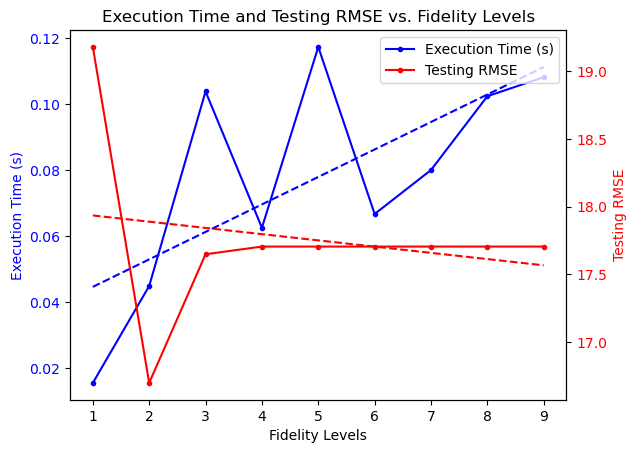

In [17]:
# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Plot the first variable (Execution Time) on the primary y-axis
ax1.plot(results_table['fidelity_levels'], results_table['Execution Time (s)'], 'b.-', label='Execution Time (s)')
ax1.set_xlabel('Fidelity Levels')
ax1.set_ylabel('Execution Time (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis and plot the second variable (Testing RMSE)
ax2 = ax1.twinx()
ax2.plot(results_table['fidelity_levels'], results_table['Testing RMSE'], 'r.-', label='Testing RMSE')
ax2.set_ylabel('Testing RMSE', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Calculate trendlines using numpy.polyfit
execution_time_trend = np.polyfit(results_table['fidelity_levels'], results_table['Execution Time (s)'], 1)
testing_rmse_trend = np.polyfit(results_table['fidelity_levels'], results_table['Testing RMSE'], 1)

# Plot the trendlines
ax1.plot(results_table['fidelity_levels'], np.polyval(execution_time_trend, results_table['fidelity_levels']), 'b--')
ax2.plot(results_table['fidelity_levels'], np.polyval(testing_rmse_trend, results_table['fidelity_levels']), 'r--')

# Show the legend for both variables and the trendlines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2 + ['Execution Time Trend', 'Testing RMSE Trend'], loc='best')

plt.title('Execution Time and Testing RMSE vs. Fidelity Levels')
plt.show()


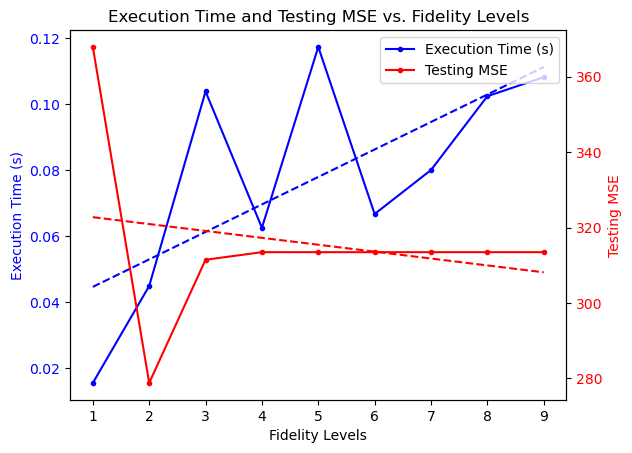

In [18]:
# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Plot the first variable (Execution Time) on the primary y-axis
ax1.plot(results_table['fidelity_levels'], results_table['Execution Time (s)'], 'b.-', label='Execution Time (s)')
ax1.set_xlabel('Fidelity Levels')
ax1.set_ylabel('Execution Time (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis and plot the second variable (Testing MSE)
ax2 = ax1.twinx()
ax2.plot(results_table['fidelity_levels'], results_table['Testing MSE'], 'r.-', label='Testing MSE')
ax2.set_ylabel('Testing MSE', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Calculate trendlines using numpy.polyfit
execution_time_trend = np.polyfit(results_table['fidelity_levels'], results_table['Execution Time (s)'], 1)
testing_mse_trend = np.polyfit(results_table['fidelity_levels'], results_table['Testing MSE'], 1)

# Plot the trendlines
ax1.plot(results_table['fidelity_levels'], np.polyval(execution_time_trend, results_table['fidelity_levels']), 'b--')
ax2.plot(results_table['fidelity_levels'], np.polyval(testing_mse_trend, results_table['fidelity_levels']), 'r--')

# Show the legend for both variables and the trendlines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2 + ['Execution Time Trend', 'Testing MSE Trend'], loc='best')

plt.title('Execution Time and Testing MSE vs. Fidelity Levels')
plt.show()


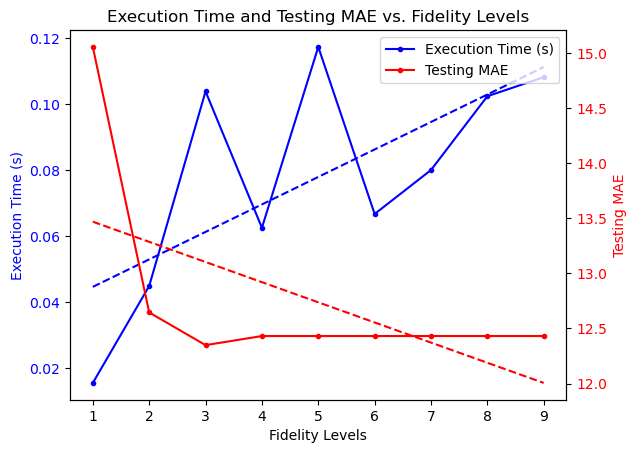

In [19]:
# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Plot the first variable (Execution Time) on the primary y-axis
ax1.plot(results_table['fidelity_levels'], results_table['Execution Time (s)'], 'b.-', label='Execution Time (s)')
ax1.set_xlabel('Fidelity Levels')
ax1.set_ylabel('Execution Time (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis and plot the second variable (Testing MAE)
ax2 = ax1.twinx()
ax2.plot(results_table['fidelity_levels'], results_table['Testing MAE'], 'r.-', label='Testing MAE')
ax2.set_ylabel('Testing MAE', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Calculate trendlines using numpy.polyfit
execution_time_trend = np.polyfit(results_table['fidelity_levels'], results_table['Execution Time (s)'], 1)
testing_MAE_trend = np.polyfit(results_table['fidelity_levels'], results_table['Testing MAE'], 1)

# Plot the trendlines
ax1.plot(results_table['fidelity_levels'], np.polyval(execution_time_trend, results_table['fidelity_levels']), 'b--')
ax2.plot(results_table['fidelity_levels'], np.polyval(testing_MAE_trend, results_table['fidelity_levels']), 'r--')

# Show the legend for both variables and the trendlines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2 + ['Execution Time Trend', 'Testing MAE Trend'], loc='best')

plt.title('Execution Time and Testing MAE vs. Fidelity Levels')
plt.show()


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Record the start time
start_time = time.time()

# Create the Random Forest regressor with max_depth set to 5
max_depth = int(math.pow(max(fidelity_levels), 3))
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Record the end time and compute the execution time
end_time = time.time()
execution_time = end_time - start_time

# Make predictions on the training and test data
y_train_pred = rf_regressor.predict(x_train)
y_test_pred = rf_regressor.predict(x_test)

# Calculate metrics for evaluation
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)



results_dict  = {
    'fidelity_levels': max(fidelity_levels),
    'max_depth': max_depth,
    'Training RMSE': train_rmse,
    'Testing RMSE': test_rmse,
    'Training MAE': train_mae,
    'Testing MAE': test_mae,
    'Training MSE': train_mse,
    'Testing MSE': test_mse,
    'Execution Time (s)': execution_time,
}

In [21]:
results_dict

{'fidelity_levels': 9,
 'max_depth': 729,
 'Training RMSE': 4.551852843120373,
 'Testing RMSE': 12.047383779149465,
 'Training MAE': 3.338071636615811,
 'Testing MAE': 8.998818087318087,
 'Training MSE': 20.719364305423024,
 'Testing MSE': 145.13945592211365,
 'Execution Time (s)': 5.000583171844482}